# DOG RATES DATA WRANGLING AND ANALYSING PROJECT



In this project we will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. Finally, we will implement some analyses and visualizations using Python and its libraries.

The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog

For this project:
- We only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- We do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

## DATA GATHERING

We will gather data from three different sources;  manually download a csv file 'twitter_archive_enhanced.csv', loading a TSV file programmatiacally using requests library and finally a json file using Twitter api to extract WeRateDogs tweets.

At the end of different gathering method we will import data to a dataframe.


### DOWNLOADING CSV file manually

Enhanced Twitter Archive

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, Only tweets with ratings are listed (there are 2356).

In [1]:
import pandas as pd
archive = pd.read_csv('C:/Users/Nemo/Desktop/Data_wrangling/twitter-archive-enhanced.csv')

In [2]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### LOADING TSV file programmatically
The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [3]:
import requests
import os

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url, auth=('user', 'pass'))
if not os.path.exists('image-predictions.tsv'):
    with open (os.path.join(_, url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)

In [5]:
predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### LOADING json file using Twitter api
Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, We will query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data will be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [181]:
#create an API object allowing to gather Twitter data
import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [182]:
#Create a loop to query JSON data and store it in a dictionnary using tweet IDs in the Twitter archive
import json
from datetime import datetime

id_list = list(archive.tweet_id)
data = {}
data['tweets'] = []
tweet_errors = {}
start_time = datetime.now()
for i in id_list:
    n_index = id_list.index(i) + 1
    try:
        tweet = tweepy.API(auth).get_status(i, tweet_mode = 'extended', wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
        tw_id = tweet._json['id_str']
        retw_count = tweet._json['retweet_count']
        fav_count = tweet._json['favorite_count']
        data['tweets'].append({'tweet_id': tw_id, 'retweet_count': retw_count, 'favorite_count': fav_count})
        
    except tweepy.TweepError as e:
        tweet_errors[n_index] = e
        print(e)
        
    time_elapsed = datetime.now() - start_time 
    print('tweet_ID:', tw_id)
    print('Time elapsed: {}'.format(time_elapsed))

tweet_ID: 892420643555336193
Time elapsed: 0:00:04.419346
tweet_ID: 892177421306343426
Time elapsed: 0:00:08.765841
tweet_ID: 891815181378084864
Time elapsed: 0:00:12.539937
tweet_ID: 891689557279858688
Time elapsed: 0:00:16.021140
tweet_ID: 891327558926688256
Time elapsed: 0:00:19.512882
tweet_ID: 891087950875897856
Time elapsed: 0:00:24.688710
tweet_ID: 890971913173991426
Time elapsed: 0:00:25.992884
tweet_ID: 890729181411237888
Time elapsed: 0:00:28.329278
tweet_ID: 890609185150312448
Time elapsed: 0:00:30.719320
tweet_ID: 890240255349198849
Time elapsed: 0:00:33.609867
tweet_ID: 890006608113172480
Time elapsed: 0:00:36.450333
tweet_ID: 889880896479866881
Time elapsed: 0:00:39.430150
tweet_ID: 889665388333682689
Time elapsed: 0:00:43.445802
tweet_ID: 889638837579907072
Time elapsed: 0:00:48.432614
tweet_ID: 889531135344209921
Time elapsed: 0:00:52.381577
tweet_ID: 889278841981685760
Time elapsed: 0:00:54.419265
tweet_ID: 888917238123831296
Time elapsed: 0:00:56.789164
tweet_ID: 8888

tweet_ID: 866094527597207552
Time elapsed: 0:08:45.508106
tweet_ID: 865718153858494464
Time elapsed: 0:08:50.503335
tweet_ID: 865359393868664832
Time elapsed: 0:08:53.457906
tweet_ID: 865006731092295680
Time elapsed: 0:08:58.238874
tweet_ID: 864873206498414592
Time elapsed: 0:09:01.328429
tweet_ID: 864279568663928832
Time elapsed: 0:09:05.922451
tweet_ID: 864197398364647424
Time elapsed: 0:09:08.672742
tweet_ID: 863907417377173506
Time elapsed: 0:09:11.457198
tweet_ID: 863553081350529029
Time elapsed: 0:09:16.411063
tweet_ID: 863471782782697472
Time elapsed: 0:09:20.093302
tweet_ID: 863432100342583297
Time elapsed: 0:09:22.830113
tweet_ID: 863427515083354112
Time elapsed: 0:09:26.149540
tweet_ID: 863079547188785154
Time elapsed: 0:09:28.313627
tweet_ID: 863062471531167744
Time elapsed: 0:09:31.056862
tweet_ID: 862831371563274240
Time elapsed: 0:09:32.735775
tweet_ID: 862722525377298433
Time elapsed: 0:09:35.793376
tweet_ID: 862457590147678208
Time elapsed: 0:09:40.703806
tweet_ID: 8620

tweet_ID: 840632337062862849
Time elapsed: 0:19:08.421082
tweet_ID: 840370681858686976
Time elapsed: 0:19:14.625130
tweet_ID: 840268004936019968
Time elapsed: 0:19:20.887720
tweet_ID: 839990271299457024
Time elapsed: 0:19:23.735120
tweet_ID: 839549326359670784
Time elapsed: 0:19:26.828395
tweet_ID: 839290600511926273
Time elapsed: 0:19:29.573562
tweet_ID: 839239871831150596
Time elapsed: 0:19:33.320679
tweet_ID: 838952994649550848
Time elapsed: 0:19:38.117675
tweet_ID: 838921590096166913
Time elapsed: 0:19:42.641534
tweet_ID: 838916489579200512
Time elapsed: 0:19:45.565135
tweet_ID: 838831947270979586
Time elapsed: 0:19:48.437261
tweet_ID: 838561493054533637
Time elapsed: 0:19:51.521030
tweet_ID: 838476387338051585
Time elapsed: 0:19:55.592534
tweet_ID: 838201503651401729
Time elapsed: 0:20:00.385211
tweet_ID: 838150277551247360
Time elapsed: 0:20:05.543613
tweet_ID: 838085839343206401
Time elapsed: 0:20:08.892463
tweet_ID: 838083903487373313
Time elapsed: 0:20:11.258789
tweet_ID: 8378

tweet_ID: 822610361945911296
Time elapsed: 0:24:24.307949
tweet_ID: 822489057087389700
Time elapsed: 0:24:25.124993
tweet_ID: 822462944365645825
Time elapsed: 0:24:25.922039
tweet_ID: 822244816520155136
Time elapsed: 0:24:26.672751
tweet_ID: 822163064745328640
Time elapsed: 0:24:27.491223
tweet_ID: 821886076407029760
Time elapsed: 0:24:28.481232
tweet_ID: 821813639212650496
Time elapsed: 0:24:29.312662
tweet_ID: 821765923262631936
Time elapsed: 0:24:30.110836
tweet_ID: 821522889702862852
Time elapsed: 0:24:30.959138
tweet_ID: 821421320206483457
Time elapsed: 0:24:31.766037
tweet_ID: 821407182352777218
Time elapsed: 0:24:32.688977
tweet_ID: 821153421864615936
Time elapsed: 0:24:33.625249
tweet_ID: 821149554670182400
Time elapsed: 0:24:34.406078
tweet_ID: 821107785811234820
Time elapsed: 0:24:35.286098
tweet_ID: 821044531881721856
Time elapsed: 0:24:36.131070
tweet_ID: 820837357901512704
Time elapsed: 0:24:37.136457
tweet_ID: 820749716845686786
Time elapsed: 0:24:38.013152
tweet_ID: 8206

tweet_ID: 803321560782307329
Time elapsed: 0:26:48.094369
tweet_ID: 803276597545603072
Time elapsed: 0:26:48.986001
tweet_ID: 802952499103731712
Time elapsed: 0:26:49.756076
tweet_ID: 802624713319034886
Time elapsed: 0:26:50.524701
tweet_ID: 802600418706604034
Time elapsed: 0:26:51.261035
tweet_ID: 802572683846291456
Time elapsed: 0:26:52.029353
tweet_ID: 802323869084381190
Time elapsed: 0:26:52.798543
tweet_ID: 802265048156610565
Time elapsed: 0:26:53.550463
[{'code': 144, 'message': 'No status found with that ID.'}]
tweet_ID: 802265048156610565
Time elapsed: 0:26:54.286679
tweet_ID: 802239329049477120
Time elapsed: 0:26:55.466841
tweet_ID: 802185808107208704
Time elapsed: 0:26:56.263018
tweet_ID: 801958328846974976
Time elapsed: 0:26:57.066460
tweet_ID: 801854953262350336
Time elapsed: 0:26:57.891358
tweet_ID: 801538201127157760
Time elapsed: 0:26:58.669036
tweet_ID: 801285448605831168
Time elapsed: 0:26:59.383076
tweet_ID: 801167903437357056
Time elapsed: 0:27:00.151126
tweet_ID: 80

tweet_ID: 786286427768250368
Time elapsed: 0:30:19.766014
tweet_ID: 786233965241827333
Time elapsed: 0:30:21.261728
tweet_ID: 786051337297522688
Time elapsed: 0:30:22.829693
tweet_ID: 786036967502913536
Time elapsed: 0:30:24.267948
tweet_ID: 785927819176054784
Time elapsed: 0:30:25.868005
tweet_ID: 785872687017132033
Time elapsed: 0:30:27.251725
tweet_ID: 785639753186217984
Time elapsed: 0:30:29.149377
tweet_ID: 785533386513321988
Time elapsed: 0:30:30.795748
tweet_ID: 785515384317313025
Time elapsed: 0:30:32.588135
tweet_ID: 785264754247995392
Time elapsed: 0:30:34.056926
tweet_ID: 785170936622350336
Time elapsed: 0:30:35.295867
tweet_ID: 784826020293709826
Time elapsed: 0:30:36.672348
tweet_ID: 784517518371221505
Time elapsed: 0:30:37.923058
tweet_ID: 784431430411685888
Time elapsed: 0:30:38.985345
tweet_ID: 784183165795655680
Time elapsed: 0:30:39.952114
tweet_ID: 784057939640352768
Time elapsed: 0:30:40.941122
tweet_ID: 783839966405230592
Time elapsed: 0:30:42.069109
tweet_ID: 7838

tweet_ID: 767191397493538821
Time elapsed: 0:32:48.197748
tweet_ID: 767122157629476866
Time elapsed: 0:32:49.091687
tweet_ID: 766864461642756096
Time elapsed: 0:32:50.688004
tweet_ID: 766793450729734144
Time elapsed: 0:32:51.442974
tweet_ID: 766714921925144576
Time elapsed: 0:32:52.244231
tweet_ID: 766693177336135680
Time elapsed: 0:32:53.119766
tweet_ID: 766423258543644672
Time elapsed: 0:32:53.921009
tweet_ID: 766313316352462849
Time elapsed: 0:32:54.766451
tweet_ID: 766078092750233600
Time elapsed: 0:32:55.567509
tweet_ID: 766069199026450432
Time elapsed: 0:32:56.391140
tweet_ID: 766008592277377025
Time elapsed: 0:32:57.381303
tweet_ID: 765719909049503744
Time elapsed: 0:32:58.421350
tweet_ID: 765669560888528897
Time elapsed: 0:32:59.258114
tweet_ID: 765395769549590528
Time elapsed: 0:33:00.081998
tweet_ID: 765371061932261376
Time elapsed: 0:33:00.897467
tweet_ID: 765222098633691136
Time elapsed: 0:33:01.949563
tweet_ID: 764857477905154048
Time elapsed: 0:33:02.828794
tweet_ID: 7642

tweet_ID: 749774190421639168
Time elapsed: 0:35:50.241910
tweet_ID: 749417653287129088
Time elapsed: 0:35:52.498542
tweet_ID: 749403093750648834
Time elapsed: 0:35:53.936475
tweet_ID: 749395845976588288
Time elapsed: 0:35:56.106117
tweet_ID: 749317047558017024
Time elapsed: 0:35:58.179803
tweet_ID: 749075273010798592
Time elapsed: 0:36:00.011010
tweet_ID: 749064354620928000
Time elapsed: 0:36:01.139765
tweet_ID: 749036806121881602
Time elapsed: 0:36:02.079679
tweet_ID: 748977405889503236
Time elapsed: 0:36:02.844002
tweet_ID: 748932637671223296
Time elapsed: 0:36:03.719628
tweet_ID: 748705597323898880
Time elapsed: 0:36:04.573382
tweet_ID: 748699167502000129
Time elapsed: 0:36:05.356501
tweet_ID: 748692773788876800
Time elapsed: 0:36:06.149387
tweet_ID: 748575535303884801
Time elapsed: 0:36:07.035890
tweet_ID: 748568946752774144
Time elapsed: 0:36:07.882101
tweet_ID: 748346686624440324
Time elapsed: 0:36:08.627002
tweet_ID: 748337862848962560
Time elapsed: 0:36:09.404328
tweet_ID: 7483

tweet_ID: 730573383004487680
Time elapsed: 0:37:56.025507
tweet_ID: 730427201120833536
Time elapsed: 0:37:56.856873
tweet_ID: 730211855403241472
Time elapsed: 0:37:57.673207
tweet_ID: 730196704625098752
Time elapsed: 0:37:58.496516
tweet_ID: 729854734790754305
Time elapsed: 0:37:59.287512
tweet_ID: 729838605770891264
Time elapsed: 0:38:00.047353
tweet_ID: 729823566028484608
Time elapsed: 0:38:00.873166
tweet_ID: 729463711119904772
Time elapsed: 0:38:01.703277
tweet_ID: 729113531270991872
Time elapsed: 0:38:02.470687
tweet_ID: 728986383096946689
Time elapsed: 0:38:03.365694
tweet_ID: 728760639972315136
Time elapsed: 0:38:04.178562
tweet_ID: 728751179681943552
Time elapsed: 0:38:05.134982
tweet_ID: 728653952833728512
Time elapsed: 0:38:06.139974
tweet_ID: 728409960103686147
Time elapsed: 0:38:07.064798
tweet_ID: 728387165835677696
Time elapsed: 0:38:08.147991
tweet_ID: 728046963732717569
Time elapsed: 0:38:09.556380
tweet_ID: 728035342121635841
Time elapsed: 0:38:10.388083
tweet_ID: 7280

tweet_ID: 709918798883774466
Time elapsed: 0:39:53.656452
tweet_ID: 709901256215666688
Time elapsed: 0:39:54.551334
tweet_ID: 709852847387627521
Time elapsed: 0:39:55.396476
tweet_ID: 709566166965075968
Time elapsed: 0:39:56.175099
tweet_ID: 709556954897764353
Time elapsed: 0:39:57.094527
tweet_ID: 709519240576036864
Time elapsed: 0:39:57.984595
tweet_ID: 709449600415961088
Time elapsed: 0:39:58.766784
tweet_ID: 709409458133323776
Time elapsed: 0:39:59.539962
tweet_ID: 709225125749587968
Time elapsed: 0:40:00.430973
tweet_ID: 709207347839836162
Time elapsed: 0:40:01.307565
tweet_ID: 709198395643068416
Time elapsed: 0:40:02.185304
tweet_ID: 709179584944730112
Time elapsed: 0:40:02.922483
tweet_ID: 709158332880297985
Time elapsed: 0:40:03.750900
tweet_ID: 709042156699303936
Time elapsed: 0:40:04.605893
tweet_ID: 708853462201716736
Time elapsed: 0:40:05.370158
tweet_ID: 708845821941387268
Time elapsed: 0:40:06.137116
tweet_ID: 708834316713893888
Time elapsed: 0:40:07.141399
tweet_ID: 7088

tweet_ID: 699088579889332224
Time elapsed: 0:41:53.626795
tweet_ID: 699079609774645248
Time elapsed: 0:41:54.486191
tweet_ID: 699072405256409088
Time elapsed: 0:41:55.231373
tweet_ID: 699060279947165696
Time elapsed: 0:41:56.006065
tweet_ID: 699036661657767936
Time elapsed: 0:41:56.769627
tweet_ID: 698989035503689728
Time elapsed: 0:41:57.521202
tweet_ID: 698953797952008193
Time elapsed: 0:41:58.295600
tweet_ID: 698907974262222848
Time elapsed: 0:41:59.047418
tweet_ID: 698710712454139905
Time elapsed: 0:41:59.865584
tweet_ID: 698703483621523456
Time elapsed: 0:42:00.595187
tweet_ID: 698635131305795584
Time elapsed: 0:42:01.338139
tweet_ID: 698549713696649216
Time elapsed: 0:42:02.105050
tweet_ID: 698355670425473025
Time elapsed: 0:42:02.843906
tweet_ID: 698342080612007937
Time elapsed: 0:42:03.591917
tweet_ID: 698262614669991936
Time elapsed: 0:42:04.347219
tweet_ID: 698195409219559425
Time elapsed: 0:42:05.132994
tweet_ID: 698178924120031232
Time elapsed: 0:42:05.922759
tweet_ID: 6979

tweet_ID: 689275259254616065
Time elapsed: 0:43:56.914329
tweet_ID: 689255633275777024
Time elapsed: 0:43:57.641252
tweet_ID: 689154315265683456
Time elapsed: 0:43:58.672416
tweet_ID: 689143371370250240
Time elapsed: 0:43:59.470595
tweet_ID: 688916208532455424
Time elapsed: 0:44:00.253499
tweet_ID: 688908934925697024
Time elapsed: 0:44:01.033997
tweet_ID: 688898160958271489
Time elapsed: 0:44:01.798621
tweet_ID: 688894073864884227
Time elapsed: 0:44:02.671088
tweet_ID: 688828561667567616
Time elapsed: 0:44:03.390560
tweet_ID: 688804835492233216
Time elapsed: 0:44:04.172234
tweet_ID: 688789766343622656
Time elapsed: 0:44:04.964135
tweet_ID: 688547210804498433
Time elapsed: 0:44:05.688506
tweet_ID: 688519176466644993
Time elapsed: 0:44:06.447968
tweet_ID: 688385280030670848
Time elapsed: 0:44:07.182810
tweet_ID: 688211956440801280
Time elapsed: 0:44:07.967469
tweet_ID: 688179443353796608
Time elapsed: 0:44:08.673574
tweet_ID: 688116655151435777
Time elapsed: 0:44:09.441811
tweet_ID: 6880

tweet_ID: 681339448655802368
Time elapsed: 0:45:57.883840
tweet_ID: 681320187870711809
Time elapsed: 0:46:00.817363
tweet_ID: 681302363064414209
Time elapsed: 0:46:03.371816
tweet_ID: 681297372102656000
Time elapsed: 0:46:06.978112
tweet_ID: 681281657291280384
Time elapsed: 0:46:07.715952
tweet_ID: 681261549936340994
Time elapsed: 0:46:08.468912
tweet_ID: 681242418453299201
Time elapsed: 0:46:09.275359
tweet_ID: 681231109724700672
Time elapsed: 0:46:10.005360
tweet_ID: 681193455364796417
Time elapsed: 0:46:10.750514
tweet_ID: 680970795137544192
Time elapsed: 0:46:11.495116
tweet_ID: 680959110691590145
Time elapsed: 0:46:12.247070
tweet_ID: 680940246314430465
Time elapsed: 0:46:13.033431
tweet_ID: 680934982542561280
Time elapsed: 0:46:13.844134
tweet_ID: 680913438424612864
Time elapsed: 0:46:14.608776
tweet_ID: 680889648562991104
Time elapsed: 0:46:15.335911
tweet_ID: 680836378243002368
Time elapsed: 0:46:16.107680
tweet_ID: 680805554198020098
Time elapsed: 0:46:17.657253
tweet_ID: 6808

tweet_ID: 676191832485810177
Time elapsed: 0:47:52.723261
tweet_ID: 676146341966438401
Time elapsed: 0:47:53.428033
tweet_ID: 676121918416756736
Time elapsed: 0:47:54.102453
tweet_ID: 676101918813499392
Time elapsed: 0:47:54.810083
tweet_ID: 676098748976615425
Time elapsed: 0:47:55.544813
tweet_ID: 676089483918516224
Time elapsed: 0:47:56.266064
tweet_ID: 675898130735476737
Time elapsed: 0:47:56.941451
tweet_ID: 675891555769696257
Time elapsed: 0:47:57.640708
tweet_ID: 675888385639251968
Time elapsed: 0:47:58.298121
tweet_ID: 675878199931371520
Time elapsed: 0:47:58.995694
tweet_ID: 675870721063669760
Time elapsed: 0:47:59.674526
tweet_ID: 675853064436391936
Time elapsed: 0:48:00.406590
tweet_ID: 675849018447167488
Time elapsed: 0:48:01.082975
tweet_ID: 675845657354215424
Time elapsed: 0:48:01.753608
tweet_ID: 675822767435051008
Time elapsed: 0:48:02.460296
tweet_ID: 675820929667219457
Time elapsed: 0:48:03.165429
tweet_ID: 675798442703122432
Time elapsed: 0:48:03.841944
tweet_ID: 6757

tweet_ID: 673148804208660480
Time elapsed: 0:50:41.392298
tweet_ID: 672997845381865473
Time elapsed: 0:50:42.128571
tweet_ID: 672995267319328768
Time elapsed: 0:50:42.858522
tweet_ID: 672988786805112832
Time elapsed: 0:50:43.605602
tweet_ID: 672984142909456390
Time elapsed: 0:50:44.402367
tweet_ID: 672980819271634944
Time elapsed: 0:50:45.156355
tweet_ID: 672975131468300288
Time elapsed: 0:50:45.928957
tweet_ID: 672970152493887488
Time elapsed: 0:50:46.720565
tweet_ID: 672968025906282496
Time elapsed: 0:50:47.475714
tweet_ID: 672964561327235073
Time elapsed: 0:50:48.228590
tweet_ID: 672902681409806336
Time elapsed: 0:50:48.969432
tweet_ID: 672898206762672129
Time elapsed: 0:50:49.703488
tweet_ID: 672884426393653248
Time elapsed: 0:50:50.488051
tweet_ID: 672877615439593473
Time elapsed: 0:50:51.240028
tweet_ID: 672834301050937345
Time elapsed: 0:50:51.981566
tweet_ID: 672828477930868736
Time elapsed: 0:50:52.726101
tweet_ID: 672640509974827008
Time elapsed: 0:50:53.631434
tweet_ID: 6726

tweet_ID: 670427002554466305
Time elapsed: 0:52:30.069914
tweet_ID: 670421925039075328
Time elapsed: 0:52:30.836163
tweet_ID: 670420569653809152
Time elapsed: 0:52:31.561121
tweet_ID: 670417414769758208
Time elapsed: 0:52:32.311403
tweet_ID: 670411370698022913
Time elapsed: 0:52:33.096281
tweet_ID: 670408998013820928
Time elapsed: 0:52:33.848171
tweet_ID: 670403879788544000
Time elapsed: 0:52:34.601148
tweet_ID: 670385711116361728
Time elapsed: 0:52:35.353620
tweet_ID: 670374371102445568
Time elapsed: 0:52:36.090834
tweet_ID: 670361874861563904
Time elapsed: 0:52:36.875850
tweet_ID: 670338931251150849
Time elapsed: 0:52:37.626516
tweet_ID: 670319130621435904
Time elapsed: 0:52:38.364046
tweet_ID: 670303360680108032
Time elapsed: 0:52:39.068940
tweet_ID: 670290420111441920
Time elapsed: 0:52:39.817455
tweet_ID: 670093938074779648
Time elapsed: 0:52:40.574077
tweet_ID: 670086499208155136
Time elapsed: 0:52:41.301089
tweet_ID: 670079681849372674
Time elapsed: 0:52:42.051633
tweet_ID: 6700

tweet_ID: 667724302356258817
Time elapsed: 0:54:17.240834
tweet_ID: 667550904950915073
Time elapsed: 0:54:17.980421
tweet_ID: 667550882905632768
Time elapsed: 0:54:18.716414
tweet_ID: 667549055577362432
Time elapsed: 0:54:19.467846
tweet_ID: 667546741521195010
Time elapsed: 0:54:20.229282
tweet_ID: 667544320556335104
Time elapsed: 0:54:20.963346
tweet_ID: 667538891197542400
Time elapsed: 0:54:21.711405
tweet_ID: 667534815156183040
Time elapsed: 0:54:22.471020
tweet_ID: 667530908589760512
Time elapsed: 0:54:23.213032
tweet_ID: 667524857454854144
Time elapsed: 0:54:24.056728
tweet_ID: 667517642048163840
Time elapsed: 0:54:24.840500
tweet_ID: 667509364010450944
Time elapsed: 0:54:25.600093
tweet_ID: 667502640335572993
Time elapsed: 0:54:26.332259
tweet_ID: 667495797102141441
Time elapsed: 0:54:27.072089
tweet_ID: 667491009379606528
Time elapsed: 0:54:27.846752
tweet_ID: 667470559035432960
Time elapsed: 0:54:28.625249
tweet_ID: 667455448082227200
Time elapsed: 0:54:29.390568
tweet_ID: 6674

In [183]:
#Write json to a file
with open('tweet_json.txt', 'w') as file:  
    json.dump(data, file)

In [7]:
import json

In [8]:
#append list with elements from json file then convert it to a dataframe
tweet_list = []

with open('tweet_json.txt') as json_f:  
    tweet_data = json.load(json_f)
    for p in tweet_data['tweets']:
        tweet_list.append({'tweet_id': p['tweet_id'],
                        'retweet_count': p['retweet_count'],
                        'favorite_count': p['favorite_count']})
tweet_df = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8379,38259
1,892177421306343426,6187,32797
2,891815181378084864,4092,24698
3,891689557279858688,8520,41585
4,891327558926688256,9229,39759


## ASSESSING DATA

### 1) Archive dataframe

- tweet_id: the unique identifier for each tweet
- in_reply_to_status_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
- in_reply_to_user_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID
- timestamp: time when this Tweet was created
- source: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client
- text: actual UTF-8 text of the status update
- retweeted_status_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
- retweeted_status_user_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID
- retweeted_status_timestamp: time of retweet
- expanded_urls: tweet URL
- rating_numerator: numerator of the rating of a dog. Note: ratings almost always greater than 10
- rating_denominator: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10
- name: name of the dog
- doggo floofer pupper puppo: the four stage in the life of a dog

### Quality

- 'tweet_id' should be str
- 'timestamp' should be datetime
- 'source'contains useless characters
- 'source' should be categorical
- 'text' should be string
- retweets need to be removed
- 'rating_denominator'should be 10
- 'rating_numerator'should be greater than 10
- Inappropriate name need to be fixed

### Tidiness

Several columns with too many NaN
- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp
- expanded_urls
Columns 'doggo', 'floofer', 'pupper', 'puppo' must be combined in one categorical variable



In [9]:
archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
333,832757312314028032,NaN,NaN,2017-02-18 01:03:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Willow. She's the official strawberry ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832757312...,13,10,Willow,None,None,None,None
137,866094527597207552,NaN,NaN,2017-05-21 00:53:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a pupper before and afte...,8.378202e+17,4.196984e+09,2017-03-04 00:21:08 +0000,https://twitter.com/dog_rates/status/837820167...,12,10,None,None,None,pupper,None
875,761227390836215808,NaN,NaN,2016-08-04 15:48:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albert. He just found out that bees ar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761227390...,10,10,Albert,None,None,None,None
1464,694356675654983680,6.706684e+17,4.196984e+09,2016-02-02 03:08:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper only appears through the hole of a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694356675...,10,10,None,None,None,pupper,None
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525...,13,10,None,doggo,None,None,None
404,824025158776213504,NaN,NaN,2017-01-24 22:44:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""I wish we were dogs"" 14/10 for @BadlandsNPS h...",NaN,NaN,NaN,https://twitter.com/badlandsnps/status/8239662...,14,10,None,None,None,None,None
2016,672169685991993344,NaN,NaN,2015-12-02 21:45:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bradley. That is his sandwich. He carr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672169685...,10,10,Bradley,None,None,None,None
2192,668932921458302977,NaN,NaN,2015-11-23 23:23:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Herald. He likes to swing. Subtle tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668932921...,9,10,Herald,None,None,None,None
1166,722613351520608256,NaN,NaN,2016-04-20 02:30:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Schnitzel. He's a Tropicana Floofboop. Ge...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722613351...,12,10,Schnitzel,None,None,None,None
1035,744995568523612160,NaN,NaN,2016-06-20 20:49:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744995568...,9,10,Abby,None,None,None,puppo


In [10]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
archive.tweet_id.duplicated().sum()

0

In [13]:
archive.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Lucy             11
Cooper           11
Lola             10
Tucker           10
Penny            10
Bo                9
Winston           9
Sadie             8
the               8
an                7
Daisy             7
Toby              7
Buddy             7
Bailey            7
Scout             6
Stanley           6
Leo               6
Koda              6
Jax               6
Rusty             6
Bella             6
Milo              6
Jack              6
Dave              6
Oscar             6
Alfie             5
               ... 
Superpup          1
Ole               1
Autumn            1
Buckley           1
Tessa             1
Walker            1
Aqua              1
Teddy             1
Ralphus           1
Roscoe            1
Remy              1
unacceptable      1
Rooney            1
Tuco              1
Antony            1
Kenzie            1
Harvey            1
Erik              1
Moofasa           1


In [14]:
archive.name.value_counts().sort_index(ascending=False)

very             5
unacceptable     1
this             1
the              8
such             1
space            1
quite            4
one              4
old              1
officially       1
not              2
my               1
mad              2
light            1
life             1
just             4
infuriating      1
incredibly       1
his              1
getting          2
by               1
an               7
all              1
actually         2
a               55
Zuzu             1
Zooey            1
Zoey             3
Zoe              1
Ziva             1
                ..
Apollo           1
Antony           1
Anthony          1
Anna             1
Angel            1
Andy             1
Andru            1
Anakin           2
Amélie           1
Amy              1
Ambrose          1
Amber            1
Alice            2
Alfy             1
Alfie            5
Alf              1
Alexanderson     1
Alexander        1
Alejandro        1
Aldrick          1
Albus            2
Albert      

In [15]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### 2) Predictions dataframe

- tweet_id: the unique identifier for each tweet
- jpg_url: dog's image URL
- img_num: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)
- p1: algorithm's #1 prediction for the image in the tweet
- p1_conf: how confident the algorithm is in its #1 prediction
- p1_dog: whether or not the #1 prediction is a breed of dog
- p2: algorithm's #2 prediction for the image in the tweet
- p2_conf: how confident the algorithm is in its #2 prediction
- p2_dog: whether or not the #2 prediction is a breed of dog
- p3: algorithm's #3 prediction for the image in the tweet
- p3_conf: how confident the algorithm is in its #3 prediction
- p3_dog: whether or not the #3 prediction is a breed of dog

### Quality

- 'tweet_id' must be str
- 'img_num' must be str

### Tidiness
- Merge dataframe with archive and tweet_df to obtain twitter_archive_master.csv


In [16]:
predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
644,681579835668455424,https://pbs.twimg.com/media/CXV1Ot_W8AEpkQO.jpg,1,Rottweiler,0.760671,True,Labrador_retriever,0.096585,True,Staffordshire_bullterrier,0.040333,True
1582,796759840936919040,https://pbs.twimg.com/media/Cw6o1JQXcAAtP78.jpg,1,American_Staffordshire_terrier,0.463996,True,Staffordshire_bullterrier,0.155566,True,Weimaraner,0.137587,True
1177,737800304142471168,https://pbs.twimg.com/media/Cj0xdMBVAAEbDHp.jpg,1,malamute,0.374682,True,Norwegian_elkhound,0.334853,True,limousine,0.068173,False
1254,748324050481647620,https://pbs.twimg.com/media/CmKUwImXIAA58f5.jpg,1,Shetland_sheepdog,0.880499,True,collie,0.107901,True,Pembroke,0.003607,True
435,674394782723014656,https://pbs.twimg.com/media/CVvueeeWwAUcQLR.jpg,1,toilet_tissue,0.134983,False,mosquito_net,0.133247,False,Lakeland_terrier,0.109099,True
722,686003207160610816,https://pbs.twimg.com/media/CYUsRsbWAAAUt4Y.jpg,1,damselfly,0.190786,False,common_newt,0.098131,False,whiptail,0.088958,False
2024,881666595344535552,https://pbs.twimg.com/media/DDxPFwbWAAEbVVR.jpg,1,Saluki,0.529012,True,Afghan_hound,0.250003,True,golden_retriever,0.160739,True
512,676215927814406144,https://pbs.twimg.com/media/CWJmzNsWUAE706Z.jpg,1,hamster,0.999484,False,guinea_pig,0.000158,False,broccoli,0.000061,False
223,670303360680108032,https://pbs.twimg.com/media/CU1lWFaVAAAl0HG.jpg,1,Shetland_sheepdog,0.380278,True,Cardigan,0.342806,True,guinea_pig,0.156249,False
368,672968025906282496,https://pbs.twimg.com/media/CVbc2V2WsAE3-kn.jpg,1,toy_poodle,0.678046,True,miniature_poodle,0.160273,True,Airedale,0.065649,True


In [17]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
predictions.duplicated().sum()

0

### 3) tweet_df dataframe

- 'tweet_id': the unique identifier for each tweet
- 'retweet_count': indicates how many times this Tweet has been retweeted
- 'favorite_count': indicates how many times this Tweet has been liked

### Tidiness

- Merge dataframe with archive and tweet_df to obtain twitter_archive_master.csv


In [20]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8379,38259
1,892177421306343426,6187,32797
2,891815181378084864,4092,24698
3,891689557279858688,8520,41585
4,891327558926688256,9229,39759


In [21]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
tweet_id          2342 non-null object
retweet_count     2342 non-null int64
favorite_count    2342 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.0+ KB


In [22]:
tweet_df.describe()

,retweet_count,favorite_count
count,2342.000000,2342.000000
mean,2954.401793,8005.345431
std,4962.343355,12368.517206
min,0.000000,0.000000
25%,593.500000,1384.250000
50%,1379.500000,3486.000000
75%,3447.750000,9816.500000
max,84239.000000,165043.000000


In [23]:
tweet_df.duplicated().sum()

0

## Cleaning DATA



In [24]:
#Make a copy of the dataframse to clean data
arch_clean = archive.copy()
pred_clean = predictions.copy()
tweet_clean = tweet_df.copy()


### 1) Archive dataframe

### Quality 

    - 'tweet_id' should be str
    - 'timestamp' should be datetime
    - 'source'contains useless characters
    - 'source' should be categorical
    - 'text' should be string
    - retweets need to be removed
    - 'rating_denominator'should be 10
    - 'rating_numerator'should be greater than 10
    - Inappropriate name need to be fixed

**- 'tweet_id' should be str**

**Define:**

Convert 'tweet_id' column to string

**Code:**

In [25]:
arch_clean['tweet_id'] = arch_clean['tweet_id'].to_string()

**Test:**

In [26]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

**- 'timestamp' should be datetime**

**Define:**

Convert 'timestamp' column to datetime format

**Code:**

In [27]:
arch_clean['timestamp'] = pd.to_datetime(arch_clean['timestamp'])

**Test:**

In [28]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

**- 'source'contains unnecessary characters.**

**Define:**

Strip html anchor tags in source column and keep only the text in between the tags. 

**Code:**

In [29]:
arch_clean.source = arch_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

**Test:**

In [30]:
arch_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

**- 'source' should be categorical**

**Define:**
    
Convert source column datatype from string to categorical.

**Code:**

In [31]:
arch_clean['source'] = arch_clean['source'].astype('category')

**Test:**

In [32]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null category
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: category(1), 

**- 'text' should be string**

**Define:**
    
Convert text column to string.

**Code:**

In [33]:
arch_clean['text'] = arch_clean['text'].to_string()

**Test:**

In [34]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null category
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: category(1), 

**- retweets need to be removed**

**Define:**
    
keep only rows with null 'retweeted_status_id'.

**Code:**

In [35]:
arch_clean = arch_clean[arch_clean['retweeted_status_id'].isnull()]

**Test:**

In [36]:
arch_clean['retweeted_status_id'].notnull().sum()

0

**- 'rating_denominator' should be 10**

**Define:**
    
Give rating_denominator a value of 10.

**Code:**

In [37]:
arch_clean['rating_denominator'] = 10

In [38]:
arch_clean['rating_denominator'].value_counts()

10    2175
Name: rating_denominator, dtype: int64

**- 'rating_numerator' should be greater 10**

**Define:**
    
Replace rating_numerator that are lower than 11 with 11, which is the minimal value allowed.

**Code:**

In [39]:
for i, row in arch_clean[arch_clean['rating_numerator'] < 11].iterrows():
    arch_clean.at[i, 'rating_numerator'] = 11

**Test:**

In [40]:
arch_clean['rating_numerator'].value_counts()

11      1299
12       500
13       307
14        43
420        2
45         1
27         1
121        1
20         1
24         1
26         1
44         1
50         1
60         1
80         1
84         1
88         1
144        1
182        1
204        1
143        1
666        1
960        1
1776       1
99         1
75         1
15         1
17         1
165        1
Name: rating_numerator, dtype: int64

**- Inappropriate name need to be fixed**

**Define:**
    
Replace all lowercase values in the name column with None.

**Code:**

In [41]:
arch_clean['name'] = arch_clean['name'].str.replace('\A[a-z]+', 'None')


**Test:**

In [42]:
arch_clean.name[arch_clean.name == 'None'].value_counts()

None    784
Name: name, dtype: int64

In [43]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null category
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: category(1), dateti

### Tidiness 


**Several columns with too many NaN**

- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp
- expanded_urls

**Define:**
    
Remove columns:
- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp
- expanded_urls

**Code:**

In [44]:
columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
           'retweeted_status_timestamp', 'expanded_urls']
arch_clean.drop(columns, axis=1, inplace = True)

In [45]:
arch_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,0 892420643555336193\n1 8921774213...,2017-08-01 16:23:56,Twitter for iPhone,0 This is Phineas. He's a mystical boy. ...,13,10,Phineas,None,None,None,None
1,0 892420643555336193\n1 8921774213...,2017-08-01 00:17:27,Twitter for iPhone,0 This is Phineas. He's a mystical boy. ...,13,10,Tilly,None,None,None,None
2,0 892420643555336193\n1 8921774213...,2017-07-31 00:18:03,Twitter for iPhone,0 This is Phineas. He's a mystical boy. ...,12,10,Archie,None,None,None,None
3,0 892420643555336193\n1 8921774213...,2017-07-30 15:58:51,Twitter for iPhone,0 This is Phineas. He's a mystical boy. ...,13,10,Darla,None,None,None,None
4,0 892420643555336193\n1 8921774213...,2017-07-29 16:00:24,Twitter for iPhone,0 This is Phineas. He's a mystical boy. ...,12,10,Franklin,None,None,None,None


In [46]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null category
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: category(1), datetime64[ns](1), int64(2), object(7)
memory usage: 269.2+ KB


**Columns 'doggo', 'floofer', 'pupper', 'puppo' must be combined in one categorical variable**

**Define:**
    
Melt 'doggo', 'floofer', 'pupper', 'puppo' columns into one category column.

**Code:**

In [47]:
arch_clean['category'] = arch_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [48]:
arch_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace = True)

**Test**

In [49]:
arch_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,category
0,0 892420643555336193\n1 8921774213...,2017-08-01 16:23:56,Twitter for iPhone,0 This is Phineas. He's a mystical boy. ...,13,10,Phineas,None
1,0 892420643555336193\n1 8921774213...,2017-08-01 00:17:27,Twitter for iPhone,0 This is Phineas. He's a mystical boy. ...,13,10,Tilly,None
2,0 892420643555336193\n1 8921774213...,2017-07-31 00:18:03,Twitter for iPhone,0 This is Phineas. He's a mystical boy. ...,12,10,Archie,None
3,0 892420643555336193\n1 8921774213...,2017-07-30 15:58:51,Twitter for iPhone,0 This is Phineas. He's a mystical boy. ...,13,10,Darla,None
4,0 892420643555336193\n1 8921774213...,2017-07-29 16:00:24,Twitter for iPhone,0 This is Phineas. He's a mystical boy. ...,12,10,Franklin,None


In [50]:
arch_clean['category'].value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: category, dtype: int64

### 2) Predictions dataframe

### Quality

- 'tweet_id' must be str
- 'img_num' must be str


**Define:**
    
Convert tweet_id and img_num to string type.

**Code:**

In [51]:
pred_clean[['tweet_id', 'img_num']] = pred_clean[['tweet_id', 'img_num']].to_string()

**Test:**

In [52]:
pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), object(6)
memory usage: 152.1+ KB


### Tidiness
- Merge dataframe with archive and tweet_df to obtain twitter_archive_master.csv

In [53]:
df_clean = pd.merge(arch_clean, pred_clean,
                            on=['tweet_id'], how='outer')

In [54]:
df_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,category,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0 892420643555336193\n1 8921774213...,2017-08-01 16:23:56,Twitter for iPhone,0 This is Phineas. He's a mystical boy. ...,13.0,10.0,Phineas,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0 892420643555336193\n1 8921774213...,2017-08-01 00:17:27,Twitter for iPhone,0 This is Phineas. He's a mystical boy. ...,13.0,10.0,Tilly,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0 892420643555336193\n1 8921774213...,2017-07-31 00:18:03,Twitter for iPhone,0 This is Phineas. He's a mystical boy. ...,12.0,10.0,Archie,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0 892420643555336193\n1 8921774213...,2017-07-30 15:58:51,Twitter for iPhone,0 This is Phineas. He's a mystical boy. ...,13.0,10.0,Darla,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0 892420643555336193\n1 8921774213...,2017-07-29 16:00:24,Twitter for iPhone,0 This is Phineas. He's a mystical boy. ...,12.0,10.0,Franklin,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4250 entries, 0 to 4249
Data columns (total 19 columns):
tweet_id              4250 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null category
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
category              2175 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null object
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null object
dtypes: category(1), datetime64[ns](1), float64(5), object(12

### 2) Tweet dataframe

### Tidiness
- Merge dataframe with archive and tweet_df to obtain twitter_archive_master.csv

In [56]:
arch_master = pd.merge(df_clean, tweet_df,
                            on=['tweet_id'], how='outer')

In [57]:
arch_master.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,category,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,0 892420643555336193\n1 8921774213...,2017-08-01 16:23:56,Twitter for iPhone,0 This is Phineas. He's a mystical boy. ...,13.0,10.0,Phineas,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0 892420643555336193\n1 8921774213...,2017-08-01 00:17:27,Twitter for iPhone,0 This is Phineas. He's a mystical boy. ...,13.0,10.0,Tilly,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0 892420643555336193\n1 8921774213...,2017-07-31 00:18:03,Twitter for iPhone,0 This is Phineas. He's a mystical boy. ...,12.0,10.0,Archie,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0 892420643555336193\n1 8921774213...,2017-07-30 15:58:51,Twitter for iPhone,0 This is Phineas. He's a mystical boy. ...,13.0,10.0,Darla,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0 892420643555336193\n1 8921774213...,2017-07-29 16:00:24,Twitter for iPhone,0 This is Phineas. He's a mystical boy. ...,12.0,10.0,Franklin,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
import sqlite3
conn = sqlite3.connect('twitter_archive_master.sqlite')
arch_master.to_sql('archive_master', conn, if_exists='replace', index=False)

## Analyzing DATA
In the exploratory Data Analysis we will try to reply to these questions:
- How does the activity evolve over the time for Twitter user @dog_rates?
- Which source is the most common?
- What are the most frequent rating?
- Which names are the most common?
- Which category is the most common and best rated?
- According to image predictions, what are the 10 most posted breeds?
- According to image predictions, what is the percentage of non dog breed in the images?

### How does the activity evolve over the time for Twitter user @dog_rates?

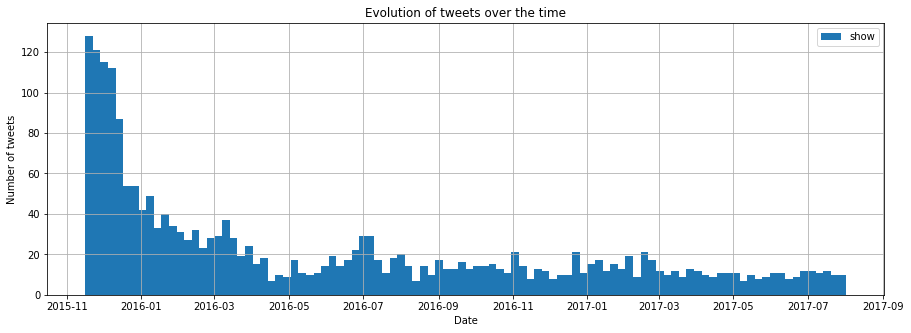

In [59]:
%matplotlib inline

plt = arch_master['timestamp'].hist(bins=100, label='show', figsize =(15, 5))
plt.legend()
plt.set_xlabel('Date')
plt.set_ylabel('Number of tweets')
plt.set_title('Evolution of tweets over the time')
plt.get_figure().savefig('Evolution_of_tweets')

### Which source is the most common?

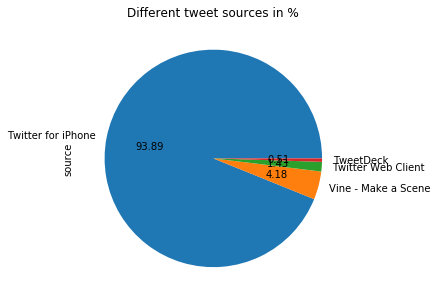

In [85]:
plt = arch_master['source'].value_counts().plot.pie(autopct='%.2f', figsize=(11,5), title='Different tweet sources in %')
plt.get_figure().savefig('tweet_sources')

### What are the most frequent rating?

In [61]:
arch_master['rating_numerator'].value_counts()

11.0      1299
12.0       500
13.0       307
14.0        43
420.0        2
84.0         1
17.0         1
204.0        1
50.0         1
27.0         1
15.0         1
960.0        1
24.0         1
80.0         1
60.0         1
44.0         1
20.0         1
26.0         1
144.0        1
88.0         1
75.0         1
99.0         1
666.0        1
45.0         1
121.0        1
182.0        1
143.0        1
165.0        1
1776.0       1
Name: rating_numerator, dtype: int64

### Which names are the most common?

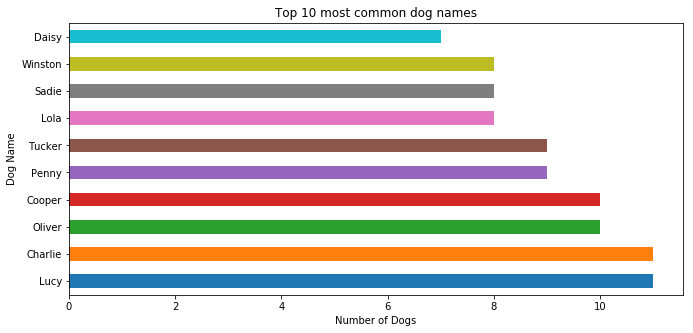

In [69]:
plt = arch_master['name'].value_counts()[1:11].plot('barh', figsize=(11,5), title='Top 10 most common dog names')
plt.set_xlabel("Number of Dogs")
plt.set_ylabel("Dog Name")
plt.get_figure().savefig('Top10_names')

### Which category is the most common and best rated?

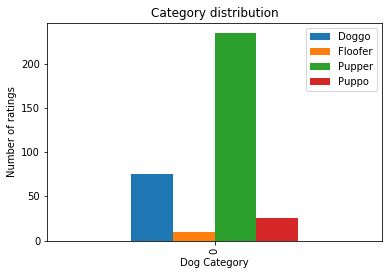

In [63]:
Cat_data = {'Doggo' : (arch_master['category'] == 'doggo').sum(), 'Floofer' : (arch_master['category'] == 'floofer').sum(), 'Pupper' : (arch_master['category'] == 'pupper').sum() , 'Puppo' : (arch_master['category'] == 'puppo').sum()}
cat_df = pd.DataFrame(Cat_data, index=[0])
plt = cat_df.plot.bar()
plt.set_xlabel("Dog Category")
plt.set_ylabel("Number of ratings")
plt.set_title("Category distribution")
plt.get_figure().savefig('Category_distribution')

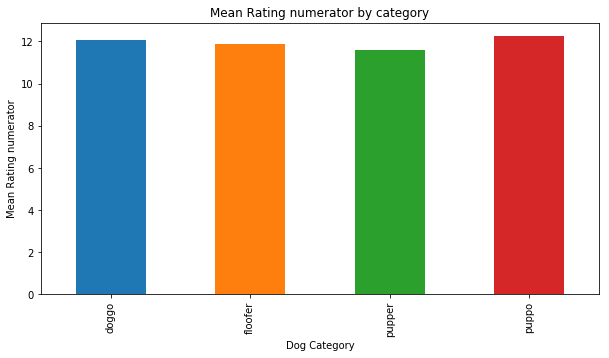

In [80]:
plt = arch_master['rating_numerator'].groupby(arch_master['category']).mean()[1:5].plot.bar(figsize=(10,5))
plt.set_xlabel("Dog Category")
plt.set_ylabel("Mean Rating numerator")
plt.set_title("Mean Rating numerator by category")
plt.get_figure().savefig('Rating_by_category')

### According to image predictions with the first algorithm, what are the 10 most posted breeds?

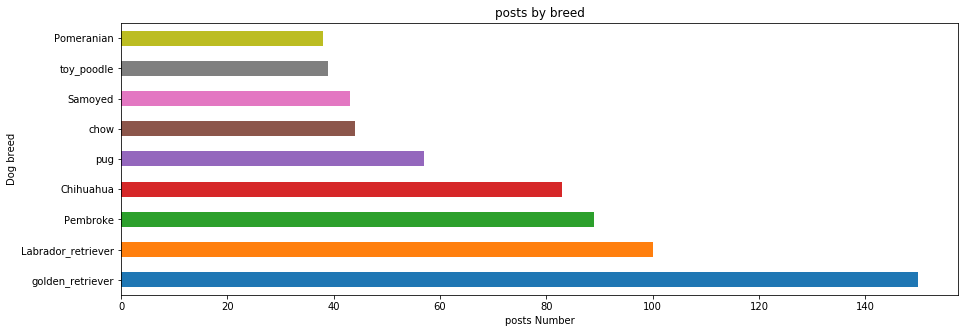

In [78]:
plt = predictions['p1'].value_counts()[0:9].plot('barh', figsize=(15,5), title='posts by breed')
plt.set_xlabel("posts Number")
plt.set_ylabel("Dog breed")
plt.get_figure().savefig('posts_by_breed')

### According to image predictions with the first algorithm, what is the percentage of non dog breed in the images?

In [72]:
(predictions['p1_dog'] == False).sum()/len(predictions)

0.2616867469879518